In [4]:
from importlib.resources import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image 
import shutil, sys  

In [5]:
path =  os.getcwd() + "\\Data"
fileList =  os.listdir(path)
fileName = path + "\\" + fileList[0]
fileNameW = path + "\\csm.tmp"

In [6]:

fP = open(fileName, 'r', encoding='utf-8')
fPw = open(fileNameW, 'w', encoding='utf-8')

In [7]:
trigger = False
for line in fP:
    if trigger == False:
        tmpbuf = line.split('\t')
        if tmpbuf[0] == "Roll":
            trigger = True
            fPw.write(line)
    else:
        fPw.write(line)
fP.close()
fPw.close()

In [8]:
data=pd.read_csv(fileNameW, sep="\t")
#data.head()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22499 entries, 0 to 22498
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Roll          22499 non-null  int64  
 1   GAP1          22499 non-null  float64
 2   GAP2          22499 non-null  float64
 3   GAP3          22499 non-null  float64
 4   GAP4          22499 non-null  float64
 5   GAP5          22499 non-null  float64
 6   GAP6          22499 non-null  float64
 7   GAP7          22499 non-null  float64
 8   GAP8          22499 non-null  float64
 9   GAP9          22499 non-null  float64
 10  GAP10         22499 non-null  float64
 11  GAP11         22499 non-null  float64
 12  GAP12         22499 non-null  float64
 13  GAP13         22499 non-null  float64
 14  GAP14         22499 non-null  float64
 15  ROT1          22499 non-null  float64
 16  ROT2          22499 non-null  float64
 17  ROT3          22499 non-null  float64
 18  ROT4          22499 non-nu

In [10]:
data.columns.array

<PandasArray>
[        'Roll',         'GAP1',         'GAP2',         'GAP3',
         'GAP4',         'GAP5',         'GAP6',         'GAP7',
         'GAP8',         'GAP9',        'GAP10',        'GAP11',
        'GAP12',        'GAP13',        'GAP14',         'ROT1',
         'ROT2',         'ROT3',         'ROT4',         'ROT5',
         'ROT6',         'ROT7',         'ROT8',       'ALIGN1',
       'ALIGN2',         'BATT', 'TEST_ON_TIME',         'Temp',
        'Humid',           '5V',          '15V']
Length: 31, dtype: object

In [11]:
data.index
data.shape

(22499, 31)

In [12]:
datan = data.to_numpy()
datan[1,1]

-8.0

In [13]:
if data.values[1,1] == -8:
    print(data.values[1,1])

-8.0


In [15]:
# 너무 느리다.
# for i in data.index:
#     if data.values[i,1] == -8:
#         print(i)

C:\Users\taroh\AppData\Local\Temp\ipykernel_27820\84247830.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inces" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("GAP1.png", bbox_inces = "tight")


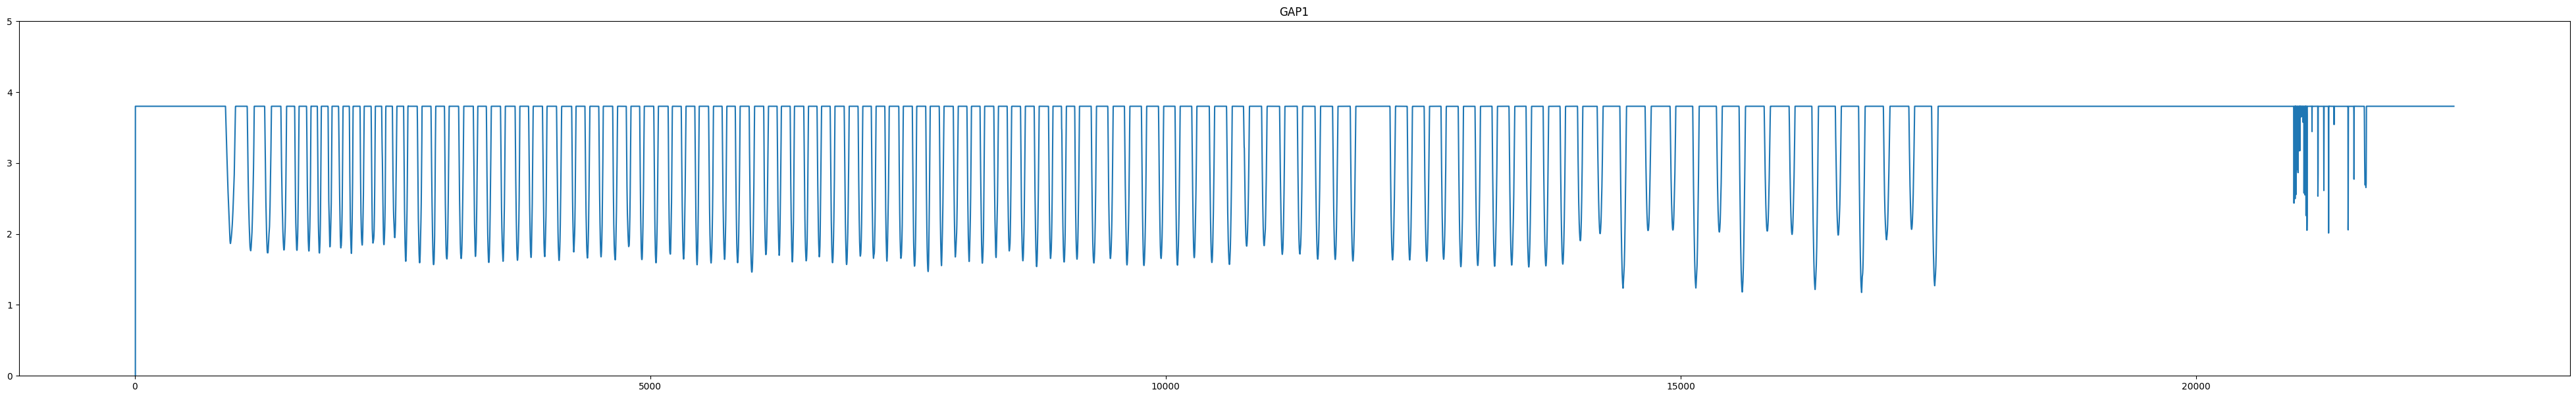

In [17]:

plt.figure(figsize=(50,7))
plt.ylim([0,5])
plt.title(label="GAP1")
plt.margins(x=None,y=None,tight=True)
plt.plot(data["GAP1"][data.index])
plt.savefig("GAP1.png")

In [25]:
img = Image.open("GAP1.png")
cropImg = img.crop((590,45,4550,660))
cropImg.save("GAP1c.png")

C:\Users\taroh\AppData\Local\Temp\ipykernel_3796\3583863930.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


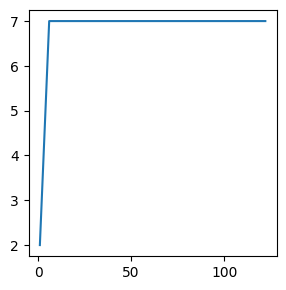

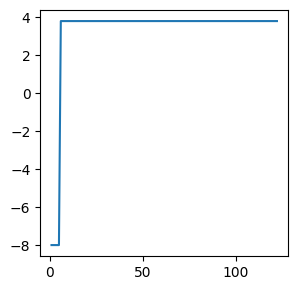

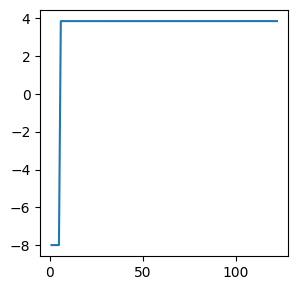

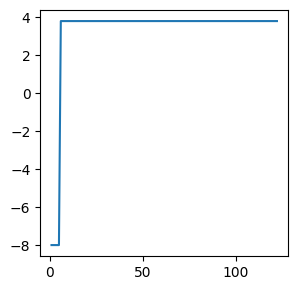

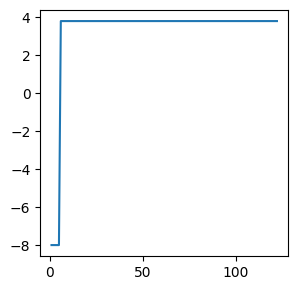

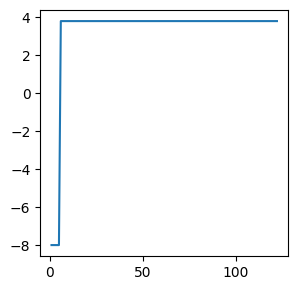

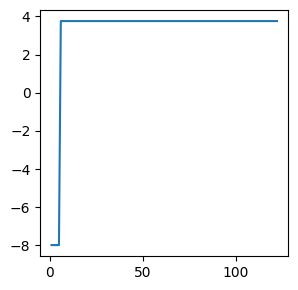

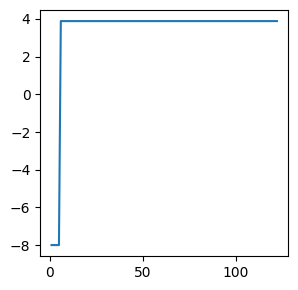

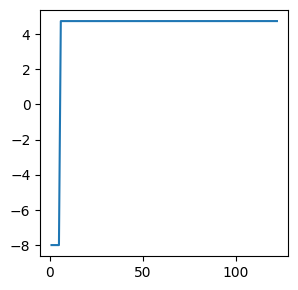

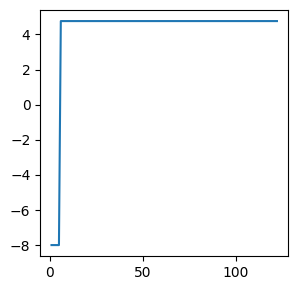

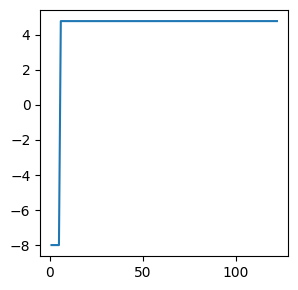

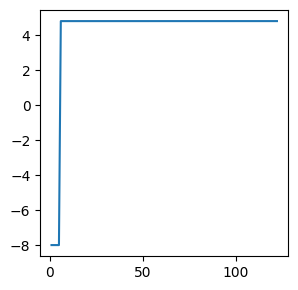

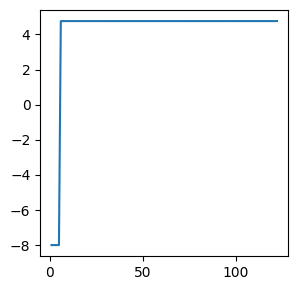

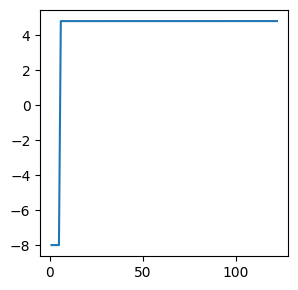

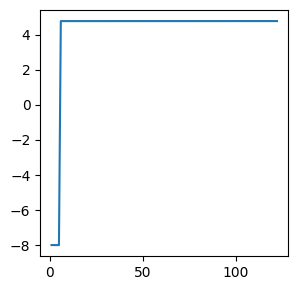

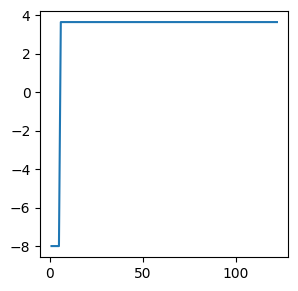

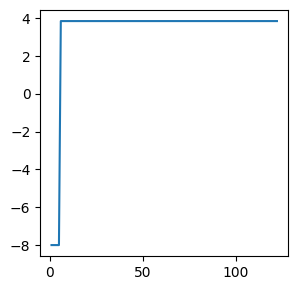

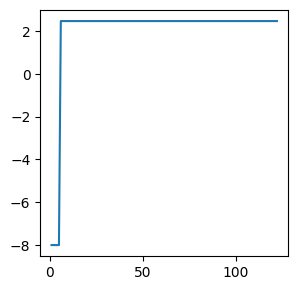

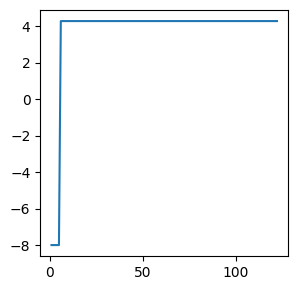

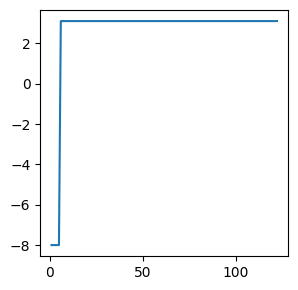

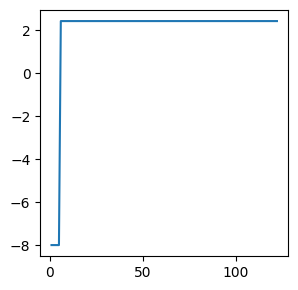

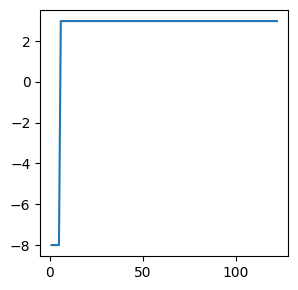

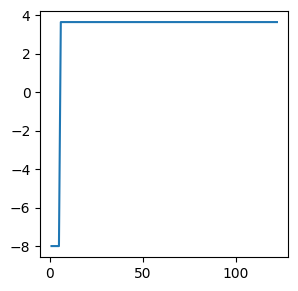

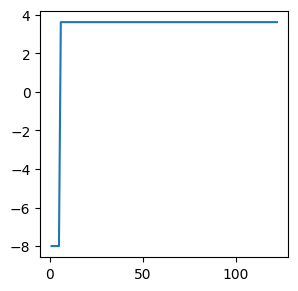

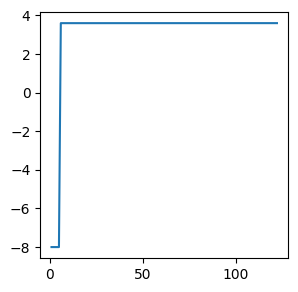

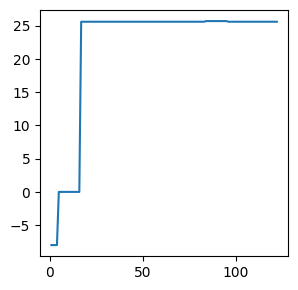

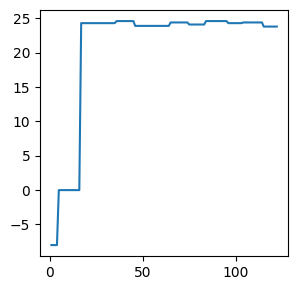

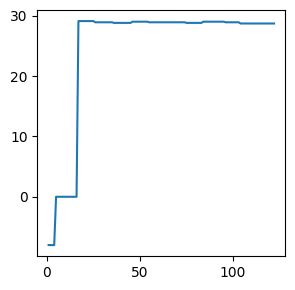

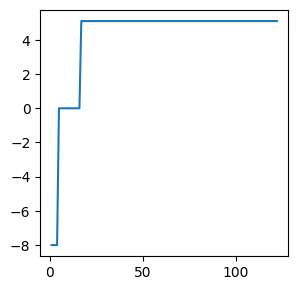

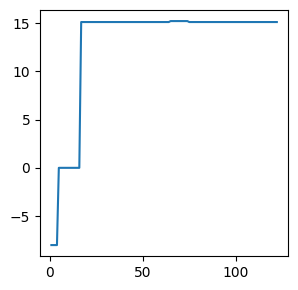

In [64]:
for col in data.columns.array:
    if col != "TEST_ON_TIME":
        #print(col)
        fig, ax = plt.subplots()        
        fig.set_title(col)
        
        x = 1920 / fig.dpi  # 가로 길이 (320 pixel)
        y = 320 / fig.dpi  # 세로 길이 (320 pixel)      
        fig.set_figwidth(x)
        fig.set_figheight(y)
        plt.plot(data['{}'.format(col)][data.Roll])
        plt.savefig('{}.png'.format(col))
    